In [574]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import re
%matplotlib inline

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Part 1

##1. Please refer the table below to answer below questions

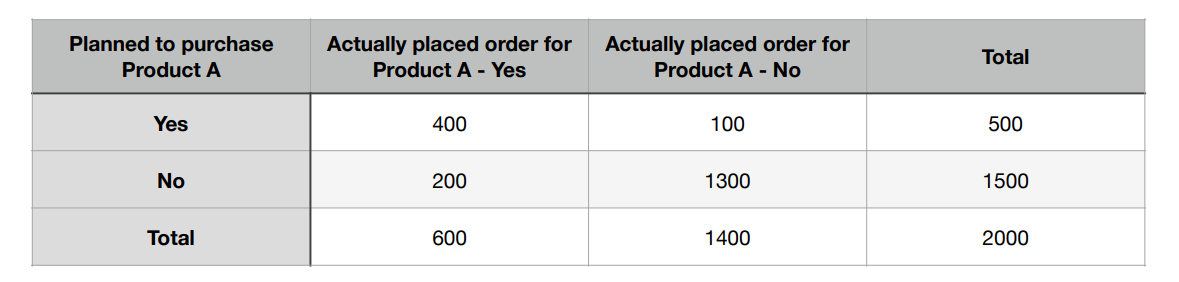

####Part 1 Q1 A. Refer above table and find the joint probability of the people who planned to purchase and actually placed an **order**

In [575]:
a=2000     #Total no. of people
b=400      #No of people who planned and actually placed the order
p=b/a
print('The probability of the people who planned to purchase and actually placed an order is',p)

The probability of the people who planned to purchase and actually placed an order is 0.2


####Part 1 Q1 B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase.

In [576]:
a= 400    #No. of people planned to purchase and placed the order
b= 500    #No. of people planned to purchase (The sample size reduced since the condition is given as the people placed to purchase)
p=a/b
print('The probability of the people who planned to purchase and actually placed an order, given that people planned to purchase is',p)

The probability of the people who planned to purchase and actually placed an order, given that people planned to purchase is 0.8


##2. An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following questions

In [577]:
p = 0.05        #Probability of failure
n = 10          #Sample size
k=np.arange(0,n+1)
binomial = binom.pmf(k=k,n=n,p=p)

####Part 1 Q2 A. Probability that none of the items are defective?


In [578]:
x = 0
print('Probability that none of the items are defective',round(binomial[x],4))

Probability that none of the items are defective 0.5987


####Part 1 Q2 B. Probability that exactly one of the items is defective?

In [579]:
x = 1
print('Probability that exactly one of the items is defective',round(binomial[x],4))

Probability that exactly one of the items is defective 0.3151


####Part 1 Q2 C. Probability that two or fewer of the items are defective? 

In [580]:
print('Probability that two or fewer of the items are defective is',round(sum(binomial[0:3]),4))

Probability that two or fewer of the items are defective is 0.9885


####Part 1 Q2 D. Probability that three or more of the items are defective? 


In [581]:
print('Probability that three or more of the items are defective',round(1-sum(binomial[0:4]),5))

Probability that three or more of the items are defective 0.00103


##3. A car salesman sells on an average 3 cars per week.

In [582]:
rate = 6  #average cars a salesman sells
n = np.arange(0,30)
poisson_distribution = poisson.pmf(n,rate)

####Part 1 Q3 A. What is Probability that in a given week he will sell some cars?

In [583]:
result = 1-poisson_distribution[0]  # poisson[0] is the probability of 0 car sells in the given week. So, 1- poisson[0] will give the probability of selling some car.
print('{:.4f} is the Probability that in a given week he will sell some cars'.format(result))

0.9975 is the Probability that in a given week he will sell some cars


####Part 1 Q3 B. What is Probability that in a given week he will sell 2 or more but less than 5 cars?

In [584]:
result = 1-sum(poisson_distribution[2:5])  
print('{:.4f} is Probability that in a given week he will sell 2 or more but less than 5 cars'.format(result))

0.7323 is Probability that in a given week he will sell 2 or more but less than 5 cars


####Part 1 Q3 C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week.

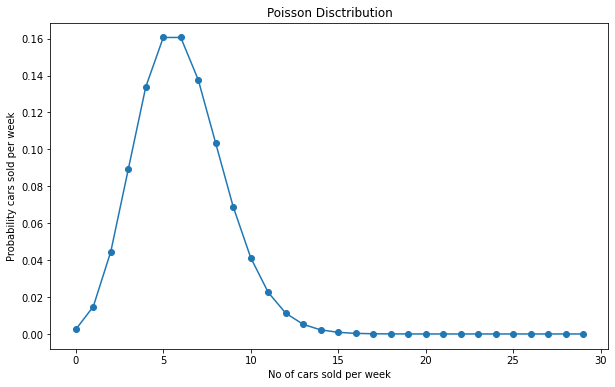

In [585]:
poisson_distribution=poisson.pmf(n,rate)
plt.figure(figsize=(10,6))
plt.plot(n, poisson_distribution,'-o')
plt.title('Poisson Disctribution')
plt.xlabel('No of cars sold per week')
plt.ylabel('Probability cars sold per week');

##4. Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed, marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours independently place orders with the same bot. Answer the following questions

In [586]:
n= 3        # No. of people placing an order
p= 0.868    # Probability of order that are taken correctly

####Part 1 Q4 A. What is the probability that all three orders will be recognised correctly?

In [587]:
x= 3
print('{:.4f} is the probability that all three orders will be recognised correctly'.format(binom.pmf(x,n=n,p=p)))

0.6540 is the probability that all three orders will be recognised correctly


####Part 1 Q4 B. What is the probability that none of the three orders will be recognised correctly?

In [588]:
x= 0
print('{:.4f} is the probability that all three orders will be recognised correctly'.format(binom.pmf(x,n=n,p=p)))

0.0023 is the probability that all three orders will be recognised correctly


####Part 1 Q4 C. What is the probability that at least two of the three orders will be recognised correctly?

In [589]:
result = 1- binom.cdf(1,n=n,p=p)
print('{:.4f} is the probability that all three orders will be recognised correctly'.format(result))

0.9523 is the probability that all three orders will be recognised correctly


##5. Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of Applied Statistics to get data driven business solution.

I have used the Applied statisctics concept in the real life industry scenario. We are the organisation wchich provide the labs as the service. We have wide range of the labs eg, AWS, GCP, AZURE and also each lab has varities of the catalog wchich is mapped to each services in the cloud. In the recent days management were intrested in knowing the following statstics
1. No of catalog available
2. No of catalogs based on the cloud platfor
3. No of catalogs consumed by the tenants
4. Catalog which were not used by the tenants
5. Catalog which were is more consumed will directly affect the revenue stream of the tenants
6. What is the probabilty of the tenants consuming the catalog which will be introduced in the the coming quarter
7. What is the probabily that the catalog will affects the pricing of the company / Tenants
8. What are the data that shows that the catalog is under used and should be promoted or add marketing statergy

#Part 2

####Part 2 Q1. Read the data set, clean the data and prepare final dataset to be used for analysis

In [590]:
team_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Applied Statistics Project/Basketball.csv')
team_df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [591]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [592]:
print('Dataframe size is ',team_df.shape) 

Dataframe size is  (61, 13)


In [593]:
team_df.describe(include='all')

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,61,61.000000,61,61,61,61,61,61,61,61,61,61,61.000000
unique,61,NaN,61,53,59,57,56,60,61,8,10,47,NaN
top,Team 1,NaN,4385,2762,7,14,37,70,3140,-,-,1929,NaN
freq,1,NaN,1,3,2,2,3,2,1,52,48,10,NaN
mean,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.081967
std,NaN,26.827225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.276663
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
75%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000


In [594]:
team_df.isnull().sum() 

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

From the above output we can say that there is no null value in the dataframe

In [595]:
team_df.Team.unique()

array(['Team 1', 'Team 2', 'Team 3', 'Team 4', 'Team 5', 'Team 6',
       'Team 7', 'Team 8', 'Team 9', 'Team 10', 'Team 11', 'Team 12',
       'Team 13', 'Team 14', 'Team 15', 'Team 16', 'Team 17', 'Team 18',
       'Team 19', 'Team 20', 'Team 21', 'Team 22', 'Team 23', 'Team 24',
       'Team 25', 'Team 26', 'Team 27', 'Team 28', 'Team 29', 'Team 30',
       'Team 31', 'Team 32', 'Team 33', 'Team 34', 'Team 35', 'Team 36',
       'Team 37', 'Team 38', 'Team 39', 'Team 40', 'Team 41', 'Team 42',
       'Team 43', 'Team 44', 'Team 45', 'Team 46', 'Team 47', 'Team 48',
       'Team 49', 'Team 50', 'Team 51', 'Team 52', 'Team 53', 'Team 54',
       'Team 55', 'Team 56', 'Team 57', 'Team 58', 'Team 59', 'Team 60',
       'Team 61'], dtype=object)

All the team names are unique

In [596]:
team_df.Score.str.isnumeric().value_counts() 

True     60
False     1
Name: Score, dtype: int64

The above output shows us that we have one non numeric value in the score column which is causing the score coulmn to be treat it as the object rather than the int

In [597]:
team_df.Score[team_df.Score.str.isnumeric()==False]

60    -
Name: Score, dtype: object

The above output shows that we have special character in the 60th row.

In [598]:
team_df.iloc[60]

Team                   Team 61
Tournament                   1
Score                        -
PlayedGames                  -
WonGames                     -
DrawnGames                   -
LostGames                    -
BasketScored                 -
BasketGiven                  -
TournamentChampion           -
Runner-up                    -
TeamLaunch             2017~18
HighestPositionHeld          9
Name: 60, dtype: object

The above out shows that most of the coulmn value in the 60th row is having the - as the value. we can remove this and convert the coulmn to integers

In [599]:
team_df.TeamLaunch=team_df.TeamLaunch.apply(lambda x : re.split(r'[-~_to]',x)[0]) #Cleaning up the year value

In [600]:
team_df = team_df.replace('-',0)
team_df = team_df.astype({'Score':'int','PlayedGames':'int','WonGames':'int','DrawnGames':'int','LostGames':'int','BasketScored':'int','BasketGiven':'int','TournamentChampion':'int','Runner-up':'int','HighestPositionHeld':'int','TeamLaunch':'int'})
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     int64 
 3   PlayedGames          61 non-null     int64 
 4   WonGames             61 non-null     int64 
 5   DrawnGames           61 non-null     int64 
 6   LostGames            61 non-null     int64 
 7   BasketScored         61 non-null     int64 
 8   BasketGiven          61 non-null     int64 
 9   TournamentChampion   61 non-null     int64 
 10  Runner-up            61 non-null     int64 
 11  TeamLaunch           61 non-null     int64 
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 6.3+ KB


The above output shows that most of the coulmns are converted to integer value. Our dataframe is cleaned and ready for down-stream process

####Part 2 Q2 Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get data driven insights on recommending which teams they can approach which will be a deal win for them. Also as a data and statistics expert you have to develop a detailed performance report using this data

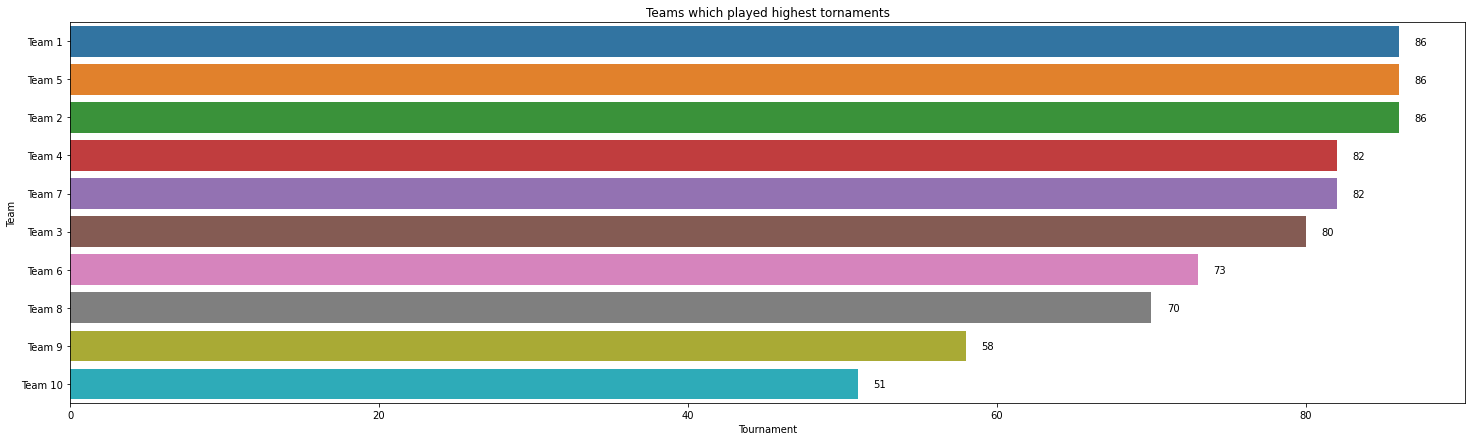

In [601]:
data = team_df.sort_values(by=['Tournament'],ascending=False).copy()
data = data[:10]
plt.figure(figsize=(25,7))
plt.title("Teams which played highest tornaments")
ax=sns.barplot(data=data,x='Tournament',y='Team');
for p in ax.patches:
  ax.annotate('{}'.format(int(p.get_width())), (p.get_width()+1,p.get_y()+0.5))

1. Team-1, Team-2 and Team-5 played the highest matches. i,e 86
2. Team-4 and Team-7 Played 2nd highest matches. i,e 80
3. Team-3 played the 3rd highest matches. i,e 80

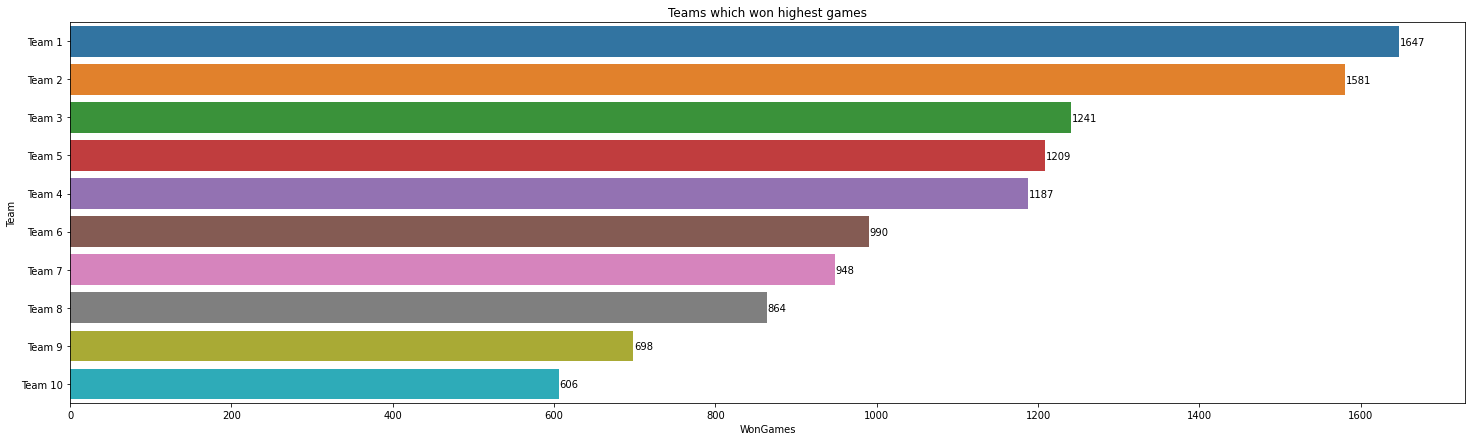

In [602]:
data = team_df.sort_values(by=['WonGames'],ascending=False).copy()
data = data[:10]
plt.figure(figsize=(25,7))
plt.title("Teams which won highest games")
ax=sns.barplot(data=data,x='WonGames',y='Team');
for p in ax.patches:
  ax.annotate('{}'.format(int(p.get_width())), (p.get_width()+1,p.get_y()+0.5))

1. Team-1 holds the title of 'Highes Winners'
2. Team-2 holds the tile of 'Second Highest Winners'

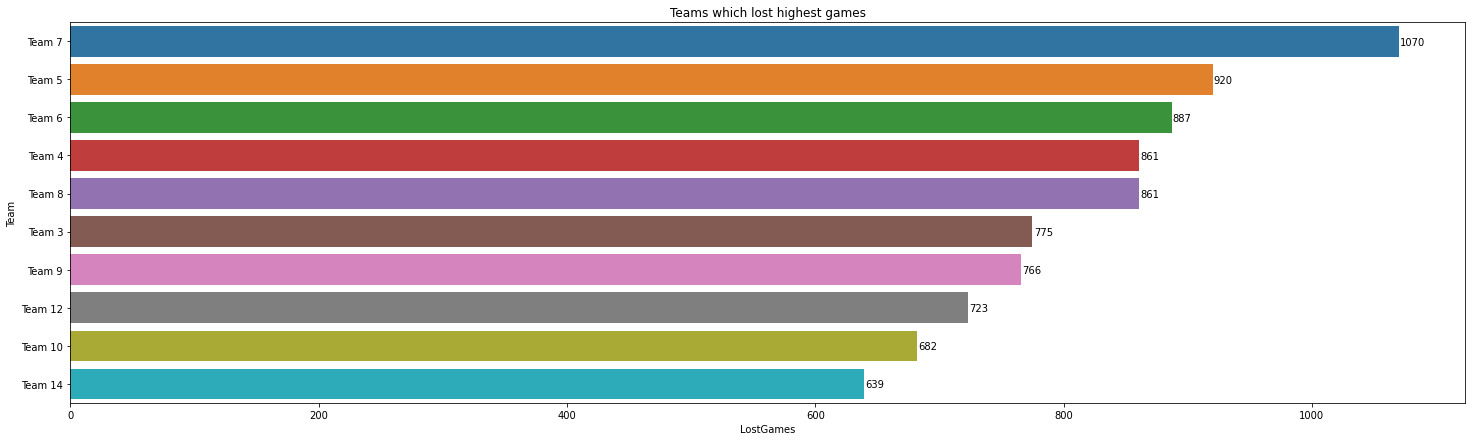

In [603]:
data = team_df.sort_values(by=['LostGames'],ascending=False).copy()
data = data[:10]
plt.figure(figsize=(25,7))
plt.title("Teams which lost highest games")
ax=sns.barplot(data=data,x='LostGames',y='Team');
for p in ax.patches:
  ax.annotate('{}'.format(int(p.get_width())), (p.get_width()+1,p.get_y()+0.5))

1. Team 7 lost the highest games i.e 1070
2. Team 5 is the second highest in loosing game. They lost 920 games

In [604]:
rate_df = team_df.assign(WinningRate = round((team_df.WonGames/team_df.PlayedGames)*100,2))
rate_df = rate_df.assign(LosingRate = round((team_df.LostGames/team_df.PlayedGames)*100,2))
rate_df = rate_df.assign(DrawRate = round((team_df.DrawnGames/team_df.PlayedGames)*100,2))

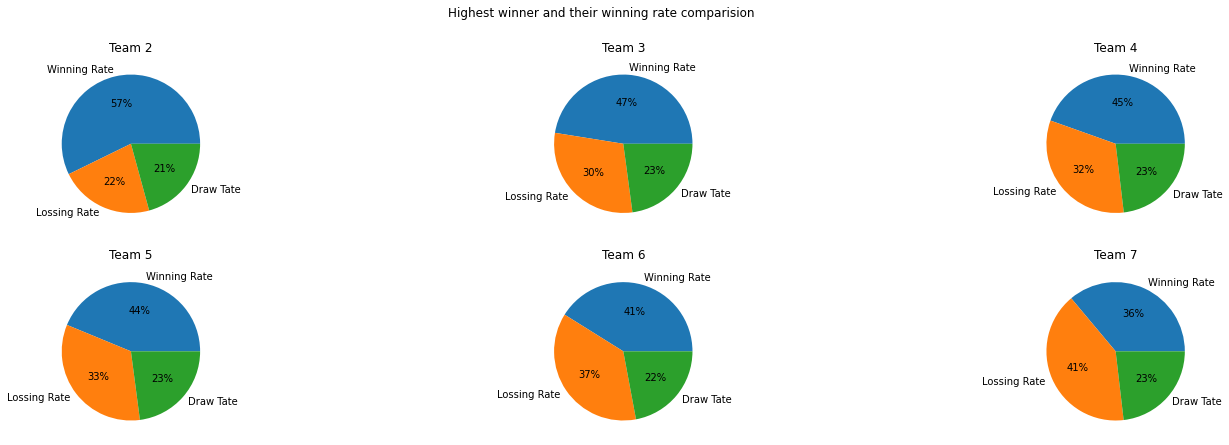

In [605]:
fig, axes = plt.subplots(2, 3, figsize=(25, 7), sharey=True)
fig.suptitle('Highest winner and their winning rate comparision')

data = rate_df.sort_values(by=['WonGames'],ascending=False).copy()
data = data[:10]
data1 = data.iloc[:,13:16]
data1 = data1.T

for i in range(1,7):
  plt.subplot(2, 3, i)
  ax=plt.pie(x=data1[i],labels=['Winning Rate','Lossing Rate','Draw Tate'],  autopct='%.0f%%')
  plt.title(data.Team[i])


The above graph shows the distribution of the winning, losing and draw game for the top 6 teams who won the highest matches

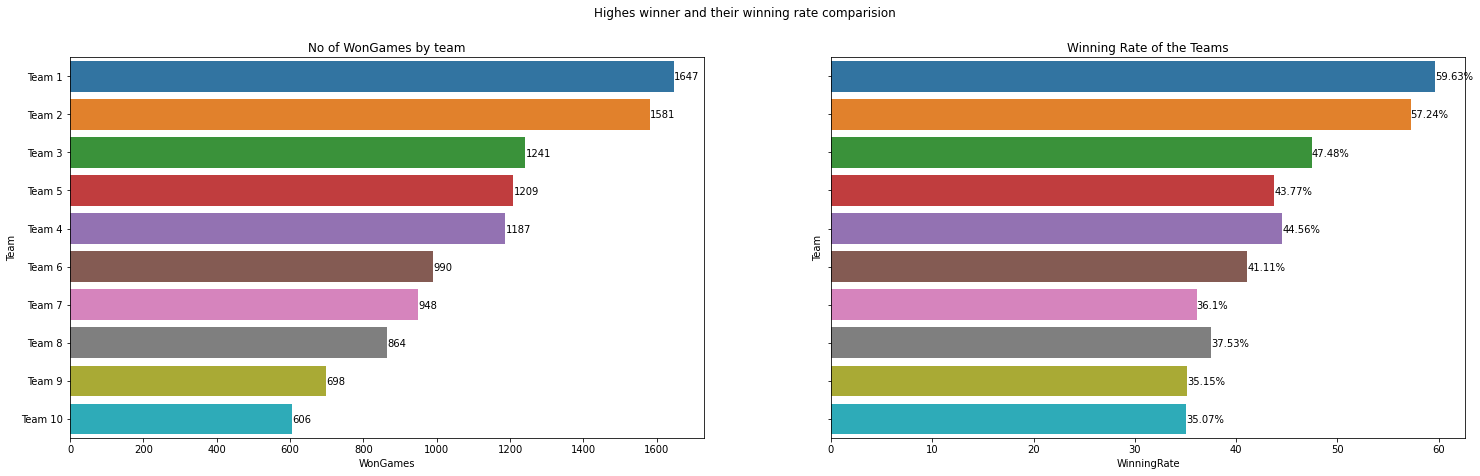

In [606]:
fig, axes = plt.subplots(1, 2, figsize=(25, 7), sharey=True)
fig.suptitle('Highes winner and their winning rate comparision')
data = rate_df.sort_values(by=['WonGames'],ascending=False).copy()
data = data[:10]

ax=sns.barplot(ax=axes[0],data=data,x='WonGames',y='Team');
axes[0].set_title("No of WonGames by team")
for p in ax.patches:
  ax.annotate('{}'.format(int(p.get_width())), (p.get_width()+1,p.get_y()+0.5))

ax=sns.barplot(ax=axes[1],data=data,x='WinningRate',y='Team');
axes[1].set_title("Winning Rate of the Teams")
for p in ax.patches:
  ax.annotate('{}%'.format((p.get_width())), (p.get_width(),p.get_y()+0.5))

1. When we comapre the Team-5 and Team-4, Even though Team-5 won maximum maches compare to Team-4, Team-4 has a better winning rate. By this we can say that if both the team play 10 matches then there is a chance that the Team can win 44.56 matches and Team-5 will only win 43.77 matches
2. Same can be used to analyse the Team-8 and Team-7. Team-8 has a better winnign rate compare to team-7

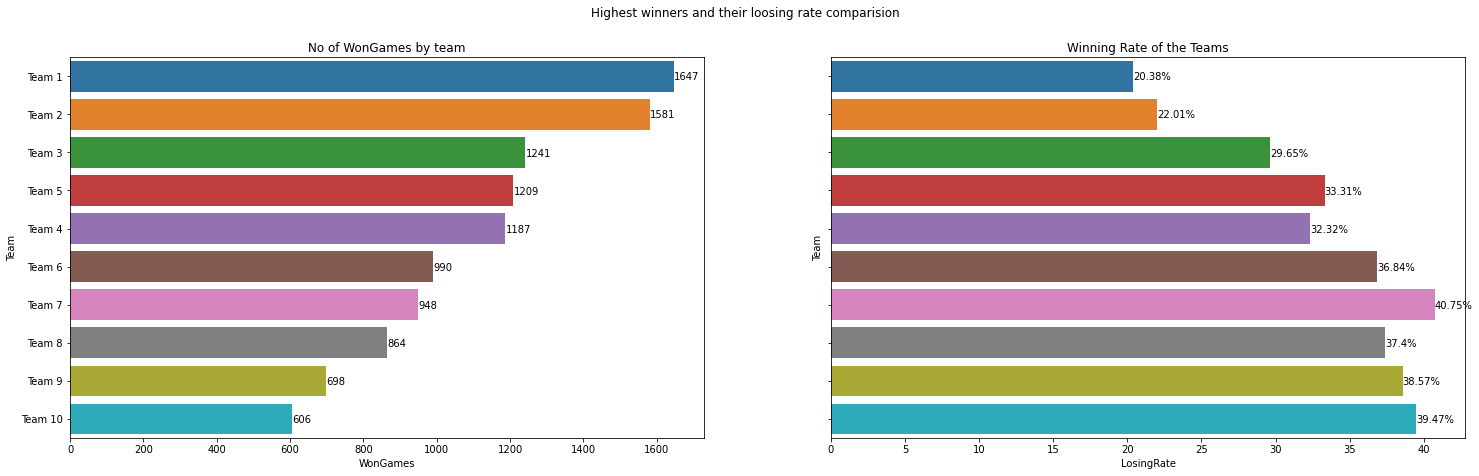

In [607]:
fig, axes = plt.subplots(1, 2, figsize=(25, 7), sharey=True)
fig.suptitle('Highest winners and their loosing rate comparision')
data = rate_df.sort_values(by=['WonGames'],ascending=False).copy()
data=data[:10]
ax=sns.barplot(ax=axes[0],data=data,x='WonGames',y='Team');
axes[0].set_title("No of WonGames by team")
for p in ax.patches:
  ax.annotate('{}'.format(int(p.get_width())), (p.get_width()+1,p.get_y()+0.5))

ax=sns.barplot(ax=axes[1],data=data,x='LosingRate',y='Team');
axes[1].set_title("Winning Rate of the Teams")
for p in ax.patches:
  ax.annotate('{}%'.format((p.get_width())), (p.get_width(),p.get_y()+0.5))

Even Though Team 7 has won more games than Team-8,9 and 10, they have more loosing rate. We can also says that the Team 8,9 and 10 try to draw the match rather than losing the game. 

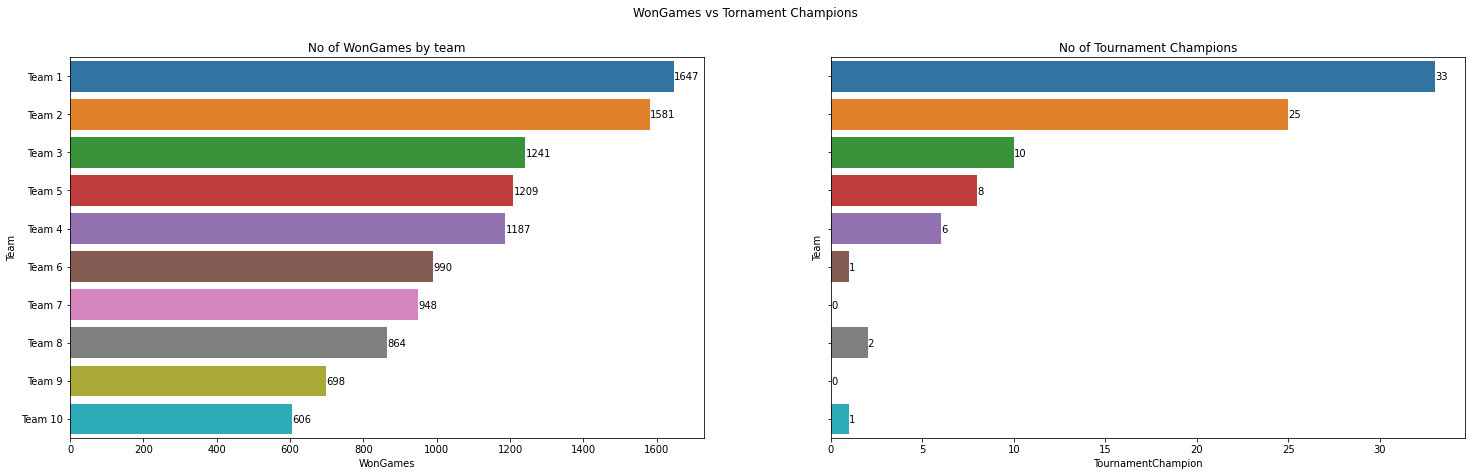

In [608]:
fig, axes = plt.subplots(1, 2, figsize=(25, 7), sharey=True)
fig.suptitle('WonGames vs Tornament Champions')
data = rate_df.sort_values(by=['WonGames'],ascending=False).copy()
data=data[:10]
ax=sns.barplot(ax=axes[0],data=data,x='WonGames',y='Team');
axes[0].set_title("No of WonGames by team")
for p in ax.patches:
  ax.annotate('{}'.format(int(p.get_width())), (p.get_width()+1,p.get_y()+0.5))

ax=sns.barplot(ax=axes[1],data=data,x='TournamentChampion',y='Team');
axes[1].set_title("No of Tournament Champions")
for p in ax.patches:
  ax.annotate('{}'.format(int(p.get_width())), (p.get_width(),p.get_y()+0.5))

Team has very good startgy to win the tournament. even though they won less games comapre to Team-7 and 8, They won the championship twice

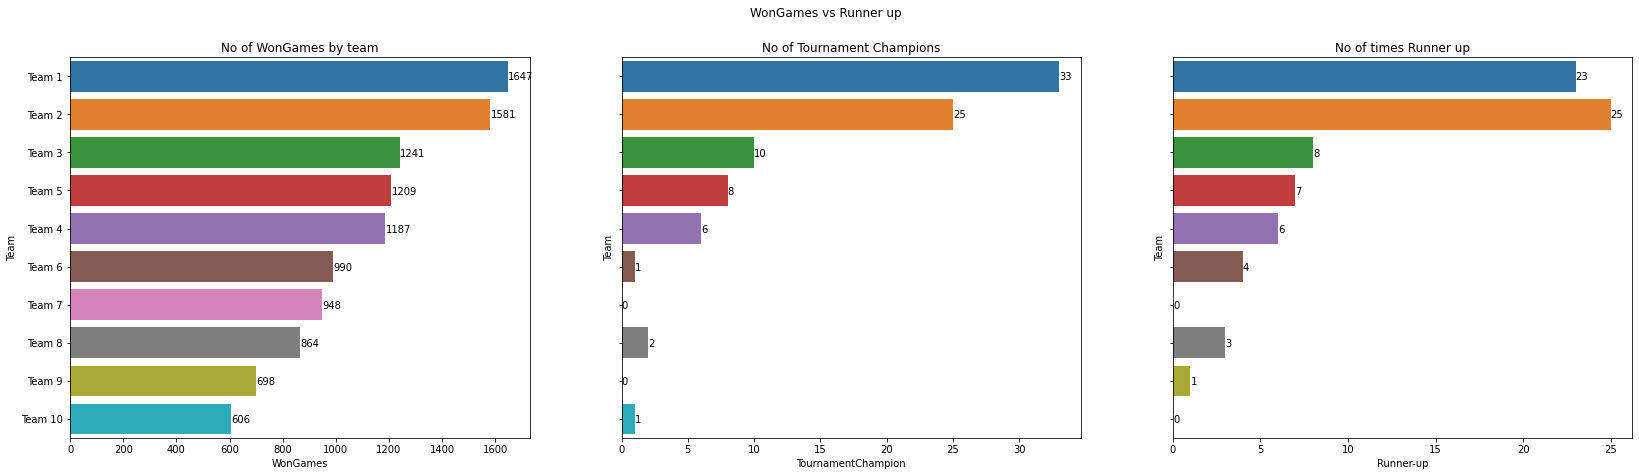

In [609]:
fig, axes = plt.subplots(1, 3, figsize=(28, 7), sharey=True)
fig.suptitle('WonGames vs Runner up')
data = rate_df.sort_values(by=['WonGames'],ascending=False).copy()
data=data[:10]
ax=sns.barplot(ax=axes[0],data=data,x='WonGames',y='Team');
axes[0].set_title("No of WonGames by team")
for p in ax.patches:
  ax.annotate('{}'.format(int(p.get_width())), (p.get_width()+1,p.get_y()+0.5))

ax=sns.barplot(ax=axes[1],data=data,x='TournamentChampion',y='Team');
axes[1].set_title("No of Tournament Champions")
for p in ax.patches:
  ax.annotate('{}'.format(int(p.get_width())), (p.get_width(),p.get_y()+0.5))

ax=sns.barplot(ax=axes[2],data=data,x='Runner-up',y='Team');
axes[2].set_title("No of times Runner up")
for p in ax.patches:
  ax.annotate('{}'.format(int(p.get_width())), (p.get_width(),p.get_y()+0.5))

1.Unfortunately, Team-7 never made to finals, even though they won more matches compare to Team-8,9 and 10
2.Team-6 played 5 finals but lost 4 times

In [610]:
Decades =rate_df.TeamLaunch.apply(lambda x : (str(x)[0:-1]+'0')+'-'+str(int(str(x)[0:-1]+'0')+10))
decade_df = rate_df.assign(Decades = Decades)

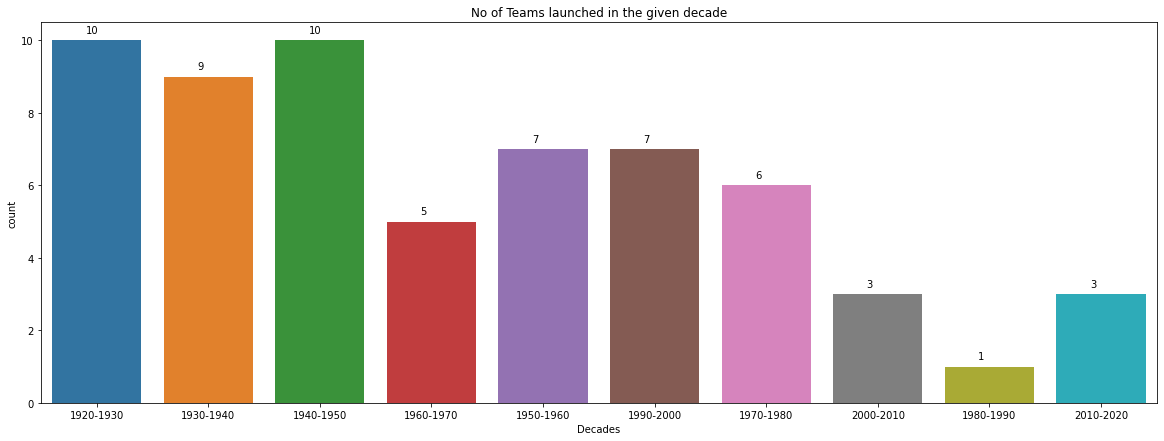

In [611]:
plt.figure(figsize=(20,7))
plt.title("No of Teams launched in the given decade")
ax=sns.countplot(data= decade_df, x= 'Decades');

for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.2))

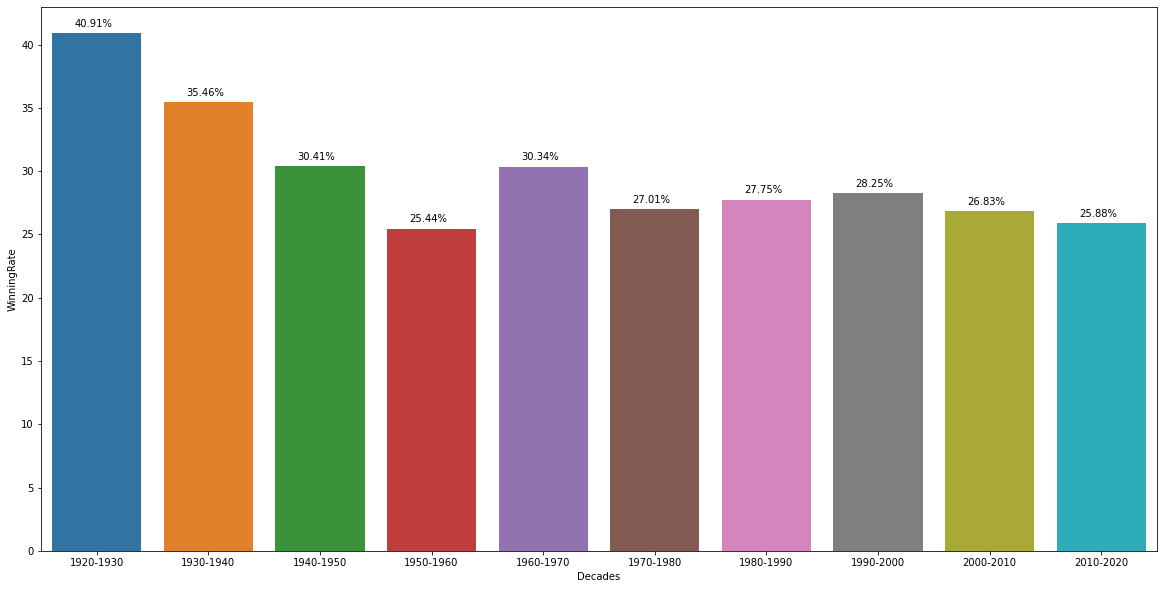

In [612]:
data = decade_df.sort_values(by=['TeamLaunch'],ascending=True).copy()
plt.figure(figsize=(20,10))
ax=sns.barplot(data=data,x='Decades',y='WinningRate',ci=None);
for p in ax.patches:
  value = 0;
  if(np.isnan(p.get_height())==False):
    value = p.get_height()
  ax.annotate('{:.2f}%'.format(value), (p.get_x()+0.2, p.get_height()+0.5))

1. Teams which were introduced in 1950-1960 has a low winning rates
2. The Latest launced teams has a very good winning rate when compares to the Teams which were introduced in the 1950-1960

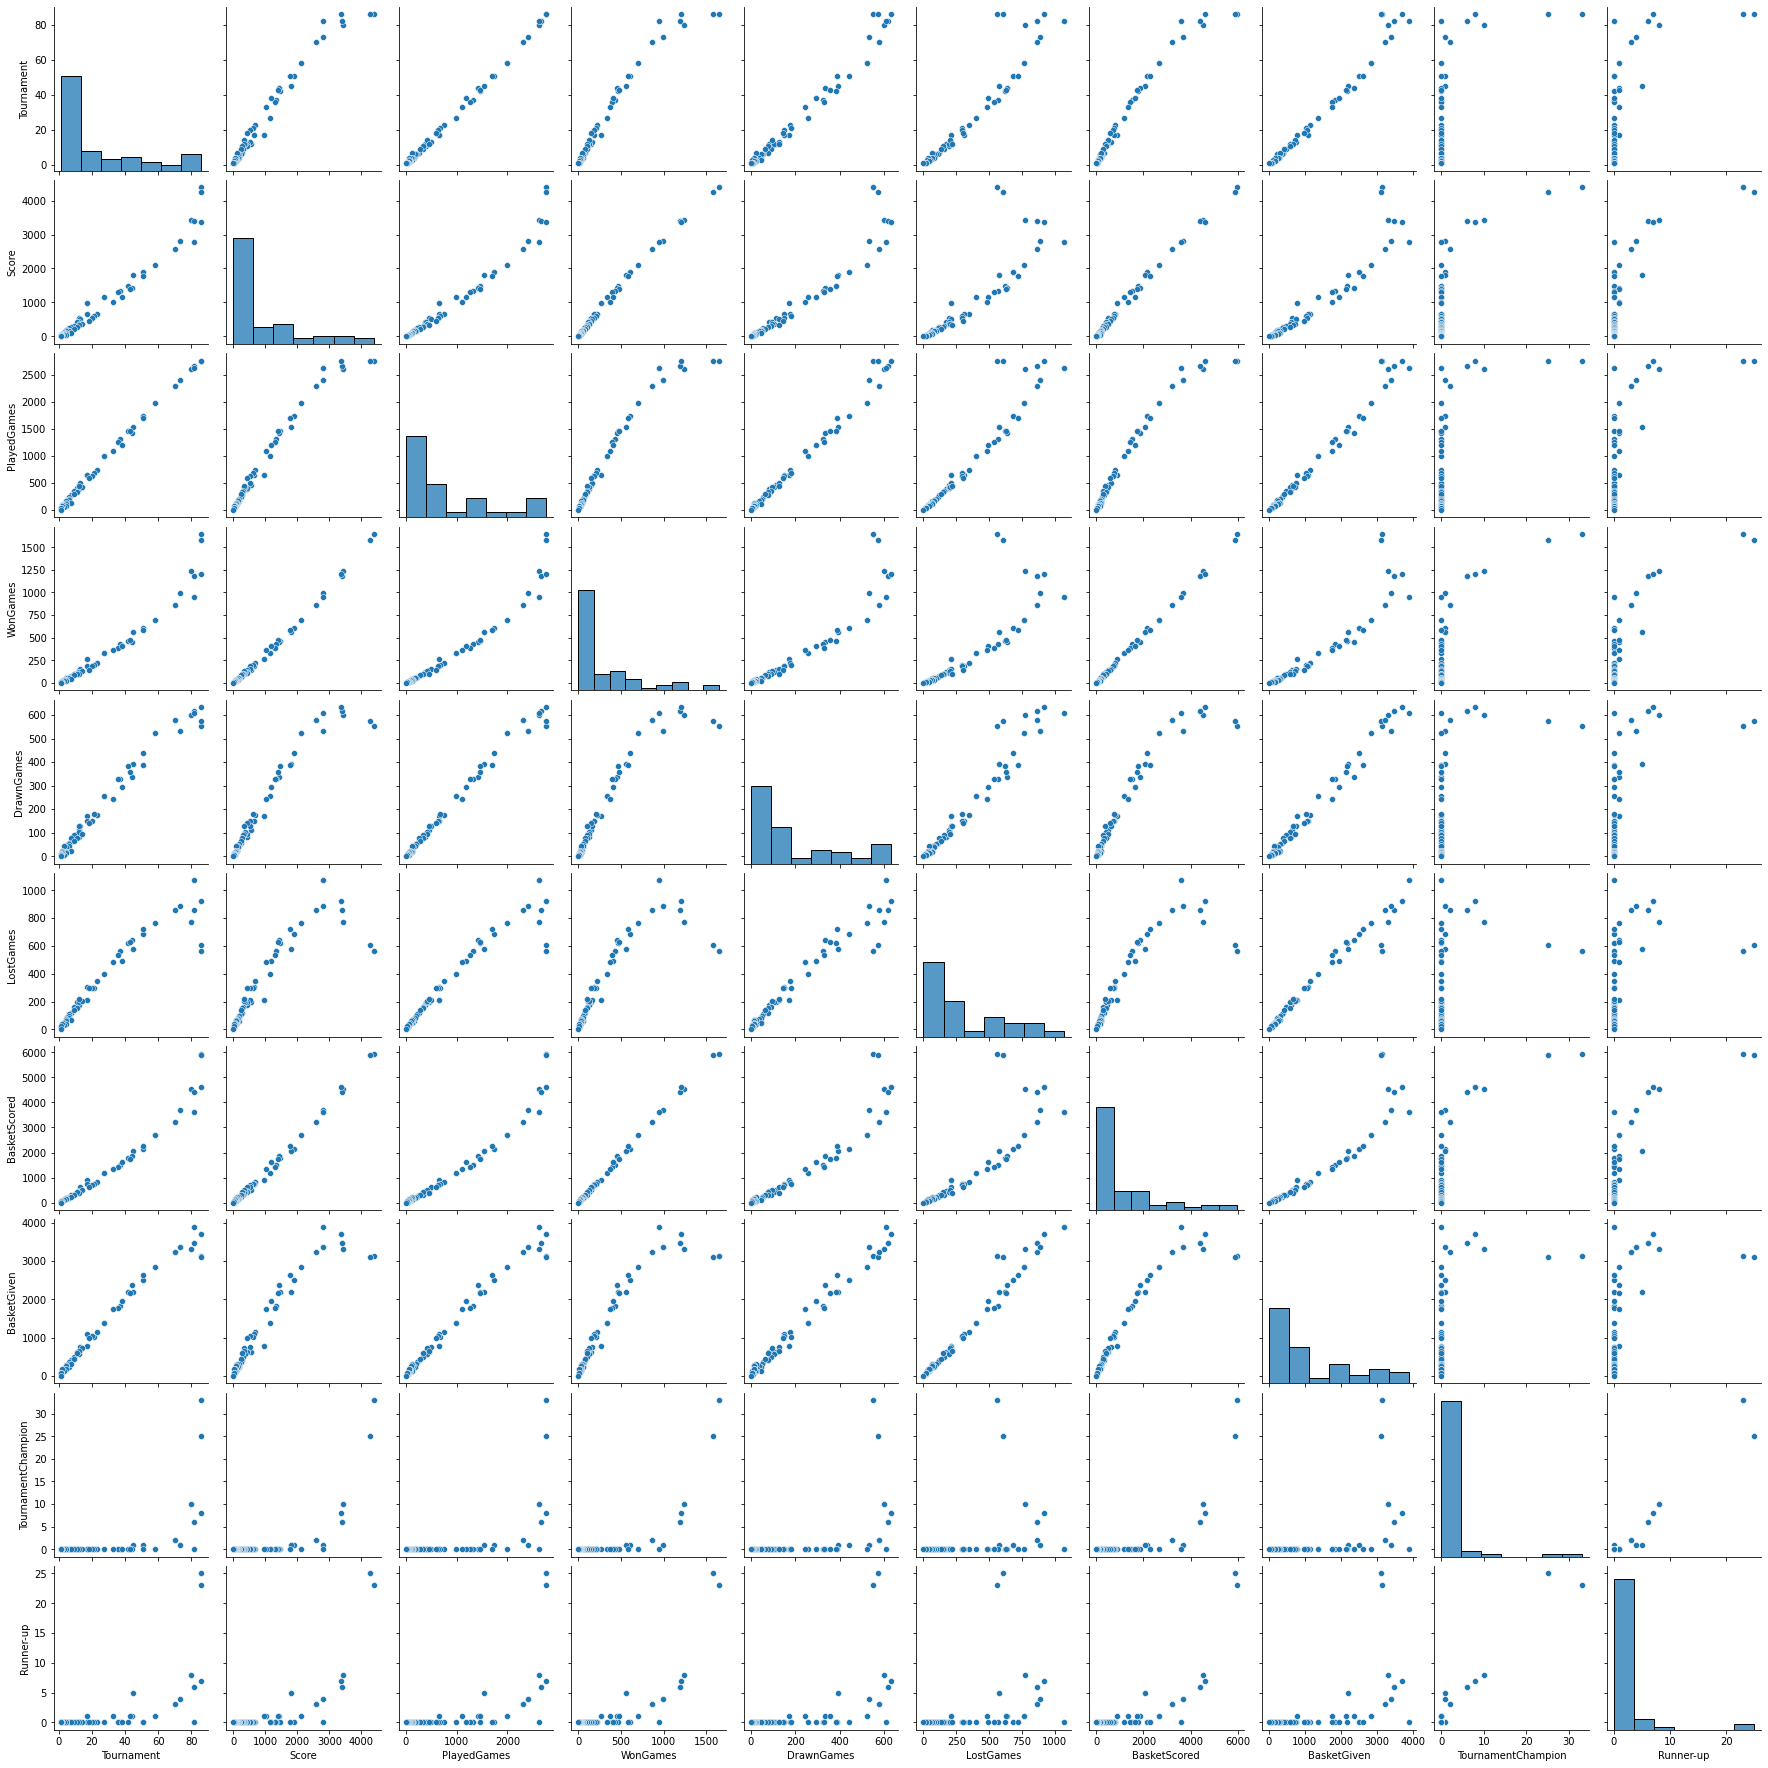

In [613]:
data = team_df.iloc[:,1:11]
sns.pairplot(data);

The above pairplot shows the corealtion between the columns. Lets analyze in the next using heatmap

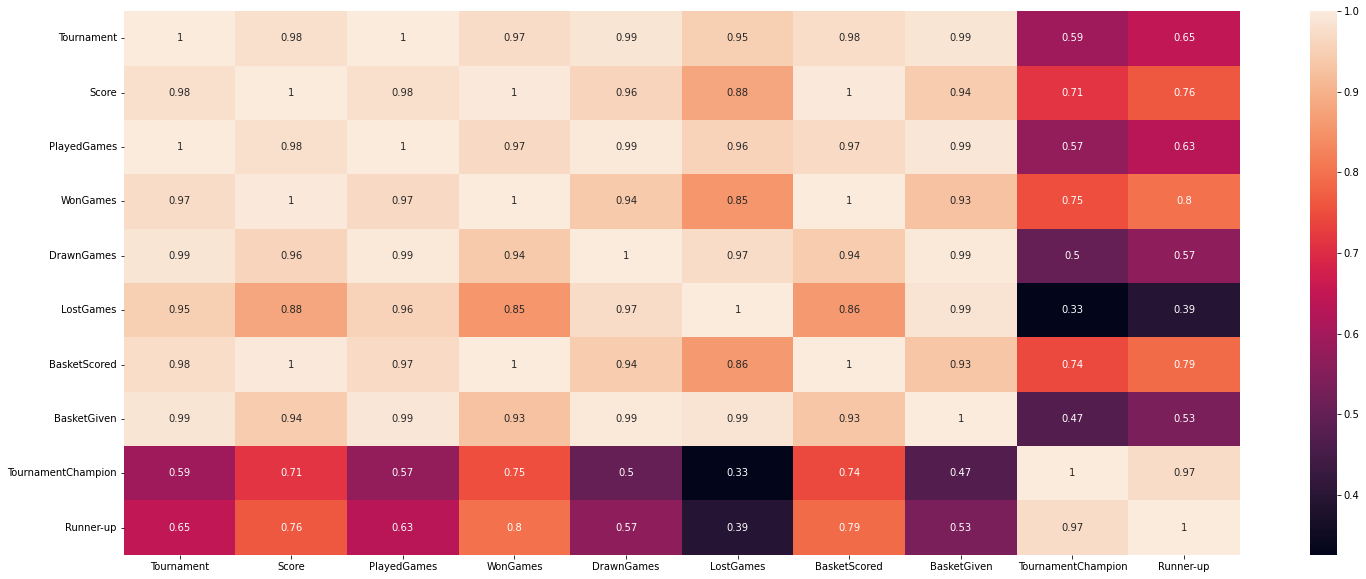

In [614]:
plt.figure(figsize=(25,10))
sns.heatmap(data = data.corr(), annot=True);

HeatMap analysis: 

1. Tournament is positvely corelated with All and highly corelated with PlayedGames
2. Score is positvely corelated with All and highly corelated with WonGames and BasketGiven. Score is negatively corealted with Basket Given and Lost Games
3. WonGame is highly corelated with BasketScored
4. LostGame is highly corelate with BasketGiven.
5. Tournament Championship is highly negatively co-related with the LostGames

Insights:
1. The above Heatmap showns Tornament, Chmapinship and Runner-up is not co-related
2. Tournament is highly co-related with the all the other matrix
3. Playing more games leads to winning oportunities
4. Winning more games leads to reach the finals (being in top 2)
5. Scoring the basket more will leads to winning the games
6. Giving the basket will leads to losing the game 


####Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the data points collected by the association to perform a better data analysis in future. At-least 1 suggestion for each point

1. Tournament : It is not about how much tournment played by the teams makes them the winner. providing the insight w.r.t tournament will help understand the progrss or ups and downs of the Team.
2. Score : 
3. PlayedGames : Played games can we tagged with the Against Team name which will helps to understard and analyze the teams performance w.r.t opponent
4. TeamLaunch : TeamLaunch will give the data of when the team have been introduced to the league but giving the data on the yearly bases will helps to under the teams performance over the period
5. GameWon, LostGame and DrawnGame : These feilds could be assosiated with the seasons and the opponents. Which helps to genrate the team performance report based on the season rather than looking into the whole sum data. 

#Part 3

####Part 3 Q1. Read the CSV file

In [615]:
company_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Applied Statistics Project/CompanyX_EU.csv')
company_df.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


####Part 3 Q2 A. Check the datatypes of each attribute

In [616]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


####Part 3 Q2 B. Check for null values in the attributes

In [617]:
company_df.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

####Part 3 Q3 A. Drop the null values

In [618]:
company_df = company_df.dropna()
company_df.describe()

,Startup,Product,Funding,Event,Result,OperatingState
count,446,446,446,446,446,446
unique,446,446,239,26,5,4
top,3DLT,3dlt.com,$1M,TC50 2008,Contestant,Operating
freq,1,1,17,31,312,319


####Part 3 Q3 B. Convert the ‘Funding’ features to a numerical value.

In [619]:
company_df.loc[:,'Funds_in_million'] = company_df['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

####Part 3 Q3 C. Plot box plot for funds in million. *italicized text*

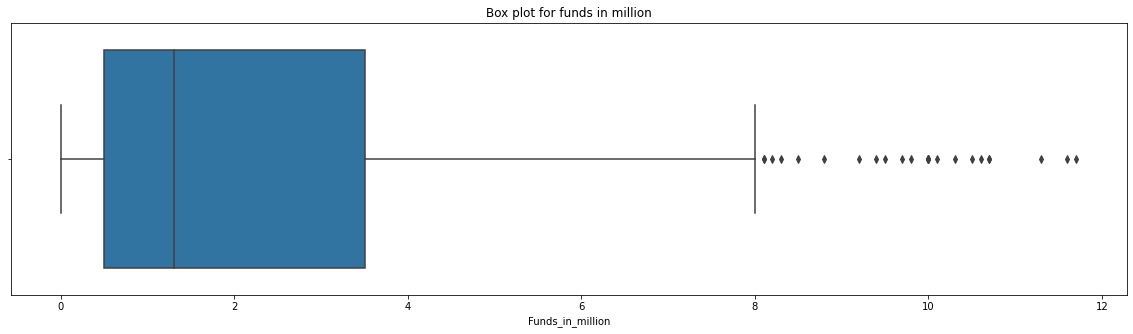

In [620]:
plt.figure(figsize=(20,5))
plt.title('Box plot for funds in million')
data = company_df[company_df.Funds_in_million<12]
ax = sns.boxplot(data = data,x='Funds_in_million')

####Part 3 Q3 D. Check the number of outliers greater than the upper fence

In [621]:
q1=company_df.Funds_in_million.quantile(0.25)
q3=company_df.Funds_in_million.quantile(0.75)
IQR=q3-q1
upperfence = q3+(1.5*IQR)
data = company_df[(company_df.Funds_in_million>(upperfence))]
data.Funds_in_million.shape

(60,)

Number of outlier are 60

####Part 3 Q3 E. Check frequency of the OperatingState features classes

In [622]:
data.OperatingState.value_counts()

Operating    44
Acquired     11
Ipo           4
Closed        1
Name: OperatingState, dtype: int64

####Part 3 Q4 A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? 

In [623]:
from statsmodels.stats.weightstats import ztest
sample1 = company_df.loc[company_df.OperatingState=='Operating','Funds_in_million'] 
sample2 = company_df.loc[company_df.OperatingState=='Closed','Funds_in_million'] 
alpha =0.05 #significance level
testData, p_value = ztest(sample1,sample2)
if p_value<=alpha:
  print('Since p_value<=aplpha There is significant difference between Funds raised by companies that are still operating vs companies that closed down')
else:
    print('Since p_value>aplpha There is no significant difference between Funds raised by companies that are still operating vs companies that closed down')


Since p_value>aplpha There is no significant difference between Funds raised by companies that are still operating vs companies that closed down


In [626]:
%%shell
jupyter nbconvert --to html /content/Applied_Statistics_Milestone.ipynb

[NbConvertApp] Converting notebook /content/Applied_Statistics_Milestone.ipynb to html
[NbConvertApp] Writing 1191040 bytes to /content/Applied_Statistics_Milestone.html
